In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from pandas import DataFrame, read_csv

In [2]:
f = "Churn.csv"
df = read_csv(f)
#df.describe

In [3]:
df['tenure'] = pd.cut(df['tenure'], 9, labels=[0, 1, 2,3,4,5,6,7,8])
#df['tenure'] = pd.cut(df['tenure'], 2, labels=[0, 1])

In [4]:
for i in range(len(df)):
    if  df.iloc[i, df.columns.get_loc('MultipleLines')] == 'No':
        df.iloc[i, df.columns.get_loc('PhoneService')] = 'One'
        
    if  df.iloc[i, df.columns.get_loc('MultipleLines')] == 'Yes':
        df.iloc[i, df.columns.get_loc('PhoneService')] = 'Many'

In [113]:
nidf = df[df['InternetService'] == 'No']
#nidf
idf = df[df['InternetService'] != 'No']
#idf

In [114]:
print(nidf.columns)
print(idf.columns)

print(len(nidf))
print(len(idf))

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
1526
5517


In [5]:
#df = df.drop(['customerID','PaperlessBilling','PaymentMethod'], axis = 1)
df = df.drop(['customerID','PaperlessBilling','PaymentMethod', 'TotalCharges'], axis = 1)
#idf = idf.drop(['customerID','PaperlessBilling','PaymentMethod', 'TotalCharges','MultipleLines'], axis = 1)
#nidf = nidf.drop(['customerID','PaperlessBilling','PaymentMethod','InternetService','TotalCharges','MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'], axis = 1)

In [6]:
df = df[df["TotalCharges"] != ' ' ]
df.describe

KeyError: 'TotalCharges'

In [192]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
#df['TotalCharges'][488]

In [177]:
df['TotalCharges'] = pd.cut(df['TotalCharges'], 20, labels=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

In [7]:
idf['MonthlyCharges'] = pd.cut(idf['MonthlyCharges'], 10, labels=[0, 1, 2,3,4,5,6,7,8,9])
nidf['MonthlyCharges'] = pd.cut(nidf['MonthlyCharges'], 10, labels=[0, 1, 2,3,4,5,6,7,8,9])

NameError: name 'idf' is not defined

In [119]:
for i in nidf.columns:
    print(i + ': ' +str(set(nidf[i]))+'\n')

print("--------------------------------------------------------")
for i in idf.columns:
    print(i + ': ' +str(set(idf[i]))+'\n')

gender: {'Female', 'Male'}

SeniorCitizen: {0, 1}

Partner: {'No', 'Yes'}

Dependents: {'No', 'Yes'}

tenure: {0, 1, 2, 3, 4, 5, 6, 7, 8}

PhoneService: {'Many', 'One'}

Contract: {'Two year', 'One year', 'Month-to-month'}

MonthlyCharges: {0, 1, 2, 3, 5, 6, 7, 8, 9}

Churn: {'No', 'Yes'}

--------------------------------------------------------
gender: {'Female', 'Male'}

SeniorCitizen: {0, 1}

Partner: {'No', 'Yes'}

Dependents: {'No', 'Yes'}

tenure: {0, 1, 2, 3, 4, 5, 6, 7, 8}

PhoneService: {'No', 'Many', 'One'}

InternetService: {'Fiber optic', 'DSL'}

OnlineSecurity: {'No', 'Yes'}

OnlineBackup: {'No', 'Yes'}

DeviceProtection: {'No', 'Yes'}

TechSupport: {'No', 'Yes'}

StreamingTV: {'No', 'Yes'}

StreamingMovies: {'No', 'Yes'}

Contract: {'Two year', 'One year', 'Month-to-month'}

MonthlyCharges: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Churn: {'No', 'Yes'}



In [54]:
nidf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,Churn
11,Male,0,No,No,16,One,Two year,No
16,Female,0,No,No,52,One,One year,No
21,Male,0,Yes,No,12,One,One year,No
22,Male,0,No,No,1,One,Month-to-month,Yes
33,Male,0,No,No,1,One,Month-to-month,No
42,Female,0,Yes,Yes,17,One,One year,No
58,Female,0,Yes,Yes,34,Many,Two year,No
68,Female,0,Yes,Yes,50,One,Two year,No
71,Female,0,Yes,Yes,52,One,One year,No
73,Male,0,Yes,Yes,62,Many,Two year,No


In [55]:
idf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Churn
0,Female,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,No
1,Male,0,No,No,34,One,DSL,Yes,No,Yes,No,No,No,One year,No
2,Male,0,No,No,2,One,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes
3,Male,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No
4,Female,0,No,No,2,One,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes
5,Female,0,No,No,8,Many,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes
6,Male,0,No,Yes,22,Many,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,No
7,Female,0,No,No,10,No,DSL,Yes,No,No,No,No,No,Month-to-month,No
8,Female,0,Yes,No,28,Many,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes
9,Male,0,No,Yes,62,One,DSL,Yes,Yes,No,No,No,No,One year,No


In [120]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in list(nidf.columns.values):
    le.fit(nidf[i])
    nidf[i] = le.transform(nidf[i])
    
nidf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,MonthlyCharges,Churn
11,1,0,0,0,1,1,2,0,0
16,0,0,0,0,6,1,1,2,0
21,1,0,1,0,1,1,1,1,0
22,1,0,0,0,0,1,0,2,1
33,1,0,0,0,0,1,0,2,0
42,0,0,1,1,2,1,1,2,0
58,0,0,1,1,4,0,2,6,0
68,0,0,1,1,6,1,2,2,0
71,0,0,1,1,6,1,1,2,0
73,1,0,1,1,7,0,2,5,0


In [121]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in list(idf.columns.values):
    le.fit(idf[i])
    idf[i] = le.transform(idf[i])
    
idf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,Churn
0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,4,2,0,1,0,1,0,0,0,1,3,0
2,1,0,0,0,0,2,0,1,1,0,0,0,0,0,3,1
3,1,0,0,0,5,1,0,1,0,1,1,0,0,1,1,0
4,0,0,0,0,0,2,1,0,0,0,0,0,0,0,4,1
5,0,0,0,0,0,0,1,0,0,1,0,1,1,0,7,1
6,1,0,0,1,2,0,1,0,1,0,0,1,0,0,6,0
7,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
8,0,0,1,0,3,0,1,0,0,1,1,1,1,0,8,1
9,1,0,0,1,7,2,0,1,1,0,0,0,0,1,3,0


In [122]:
X = idf[idf.columns.tolist()[:-1]]#.head(size)
Y = idf[idf.columns.tolist()[-1]]#.head(size)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size =  0.3, random_state = 42)

labels = np.array(train_y)
features = np.array(train_x)

print(len(X))
print(len(Y))
print(len(train_x))
print(len(test_x))
print(len(train_y))
print(len(test_y))

5517
5517
3861
1656
3861
1656


In [125]:
X = nidf[nidf.columns.tolist()[:-1]]#.head(size)
Y = nidf[nidf.columns.tolist()[-1]]#.head(size)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size =  0.3, random_state = 42)

labels = np.array(train_y)
features = np.array(train_x)

print(len(X))
print(len(Y))
print(len(train_x))
print(len(test_x))
print(len(train_y))
print(len(test_y))

1526
1526
1068
458
1068
458


In [35]:
#RANDOM FOREST
clf = RandomForestClassifier()

In [37]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(train_x)  
train_x = scaler.transform(train_x)  
# apply same transformation to test data
test_x = scaler.transform(test_x) 

features = np.array(train_x)

In [126]:
#LOGISTIC REGRESSION
from sklearn import linear_model
clf = linear_model.LogisticRegression(C=1e5)

In [38]:
#NEURAL NETWORK
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

In [127]:
TrainedModel = clf.fit(features, labels)

predictions = TrainedModel.predict(test_x)

print("Test Accuracy  :: " + str(accuracy_score(test_y, predictions) * 100) + " % ")

Test Accuracy  :: 92.3580786026 % 


In [156]:
conf_arr = confusion_matrix(test_y, predictions)

In [108]:
import matplotlib.pyplot as plt
idf.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Churn
gender,1.0,-0.005,0.027,0.013,0.015,0.0033,-0.011,-0.018,-0.014,0.00023,-0.0086,-0.0073,-0.0099,0.0036,-0.0082
SeniorCitizen,-0.005,1.0,0.018,-0.21,0.0016,-0.11,0.2,-0.11,-0.0036,-0.011,-0.14,0.034,0.05,-0.13,0.12
Partner,0.027,0.018,1.0,0.42,0.38,-0.14,0.00075,0.17,0.17,0.19,0.14,0.16,0.15,0.29,-0.16
Dependents,0.013,-0.21,0.42,1.0,0.17,0.0031,-0.13,0.16,0.098,0.085,0.14,0.054,0.024,0.22,-0.15
tenure,0.015,0.0016,0.38,0.17,1.0,-0.34,0.0023,0.37,0.42,0.42,0.37,0.33,0.33,0.69,-0.4
PhoneService,0.0033,-0.11,-0.14,0.0031,-0.34,1.0,-0.22,-0.048,-0.15,-0.16,-0.051,-0.2,-0.21,-0.16,0.016
InternetService,-0.011,0.2,0.00075,-0.13,0.0023,-0.22,1.0,-0.22,-0.015,-0.0016,-0.21,0.17,0.16,-0.19,0.24
OnlineSecurity,-0.018,-0.11,0.17,0.16,0.37,-0.048,-0.22,1.0,0.18,0.17,0.27,0.044,0.056,0.41,-0.28
OnlineBackup,-0.014,-0.0036,0.17,0.098,0.42,-0.15,-0.015,0.18,1.0,0.19,0.19,0.15,0.14,0.32,-0.2
DeviceProtection,0.00023,-0.011,0.19,0.085,0.42,-0.16,-0.0016,0.17,0.19,1.0,0.24,0.28,0.29,0.4,-0.18


In [163]:
df.groupby('InternetService').count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
InternetService,,,,,,,,,,,,,,,,,,,,
DSL,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421
Fiber optic,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096
No,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526


In [173]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

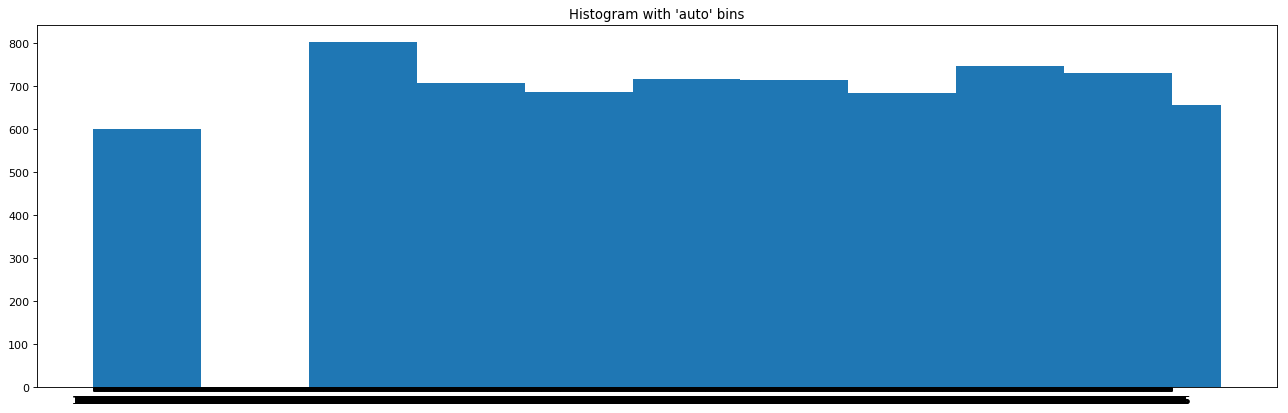

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

plt.hist(df['TotalCharges'], bins=10)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()